Import Nacessary Libraries

About Dataset


Context

The Customer Shopping Preferences Dataset offers valuable insights into consumer behavior and purchasing patterns. Understanding customer preferences and trends is critical for businesses to tailor their products, marketing strategies, and overall customer experience. This dataset captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Analyzing this data can help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction. The dataset stands as a valuable resource for businesses aiming to align their strategies with customer needs and preferences. It's important to note that this dataset is a Synthetic Dataset Created for Beginners to learn more about Data Analysis and Machine Learning.

Content

This dataset encompasses various features related to customer shopping preferences, gathering essential information for businesses seeking to enhance their understanding of their customer base. The features include customer age, gender, purchase amount, preferred payment methods, frequency of purchases, and feedback ratings. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included. With a collection of 3900 records, this dataset serves as a foundation for businesses looking to apply data-driven insights for better decision-making and customer-centric strategies.

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [4]:
data = pd.read_csv('../project data science/shopping_trends.csv')

Explore Data🔎

In [5]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


_Customer ID : Unique identifier for each customer

_Age : Age of the customer

_Gender : Gender of the customer (Male/Female)


_Item Purchased : The item purchased by the customer

_Category : Category of the item purchased

_Purchase Amount (USD) : The amount of the purchase in USD

_Location : Location where the purchase was made

_Size : Size of the purchased item

_Color : Color of the purchased item

_Season : Season during which the purchase was made

_Review Rating : Rating given by the customer for the purchased item

_Subscription Status : Indicates if the customer has a subscription (Yes/No)

_Shipping Type : Type of shipping chosen by the customer

_Discount Applied : Indicates if a discount was applied to the purchase 
(Yes/No)

_Promo Code Used : Indicates if a promo code was used for the purchase (Yes/No
)
_Previous Purchases : The total count of transactions concluded by the customer at the store, _excluding the ongoing transaction

_Payment Method : Customer's most preferred payment method

_Frequency of Purchases : Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [6]:
data.shape

(3900, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
# check Missing value
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [9]:
#check duplication
data.duplicated().sum()

0

There aren't duplicate values

In [10]:
# Check the number of unique values of each column
data.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

In [11]:
# Check statistic of dataset
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Let's start checking the unique values for each column

Analysis📝 & Visualiation📊

In [12]:
# Drop Column Customer ID because it is not important in the analysis
data=data.drop(['Customer ID'],axis=1)

In [13]:
data.Age.describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

Gender
Male      2652
Female    1248
Name: count, dtype: int64 



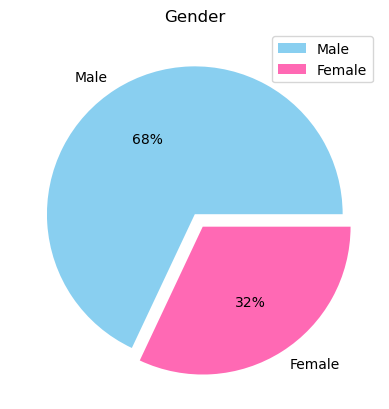

In [14]:
gender = data.Gender.value_counts()
print(gender,'\n')

plt.pie(gender,labels=gender.index,colors=["#89CFF0", "#FF69B4"],autopct='%.0f%%',explode=(0,0.1))
plt.legend(labels = gender.index, loc = "best")
plt.title('Gender')
plt.show()

We notice that the number of male customers is much greater than the number of female customers(more than double the number).

In [15]:
data['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

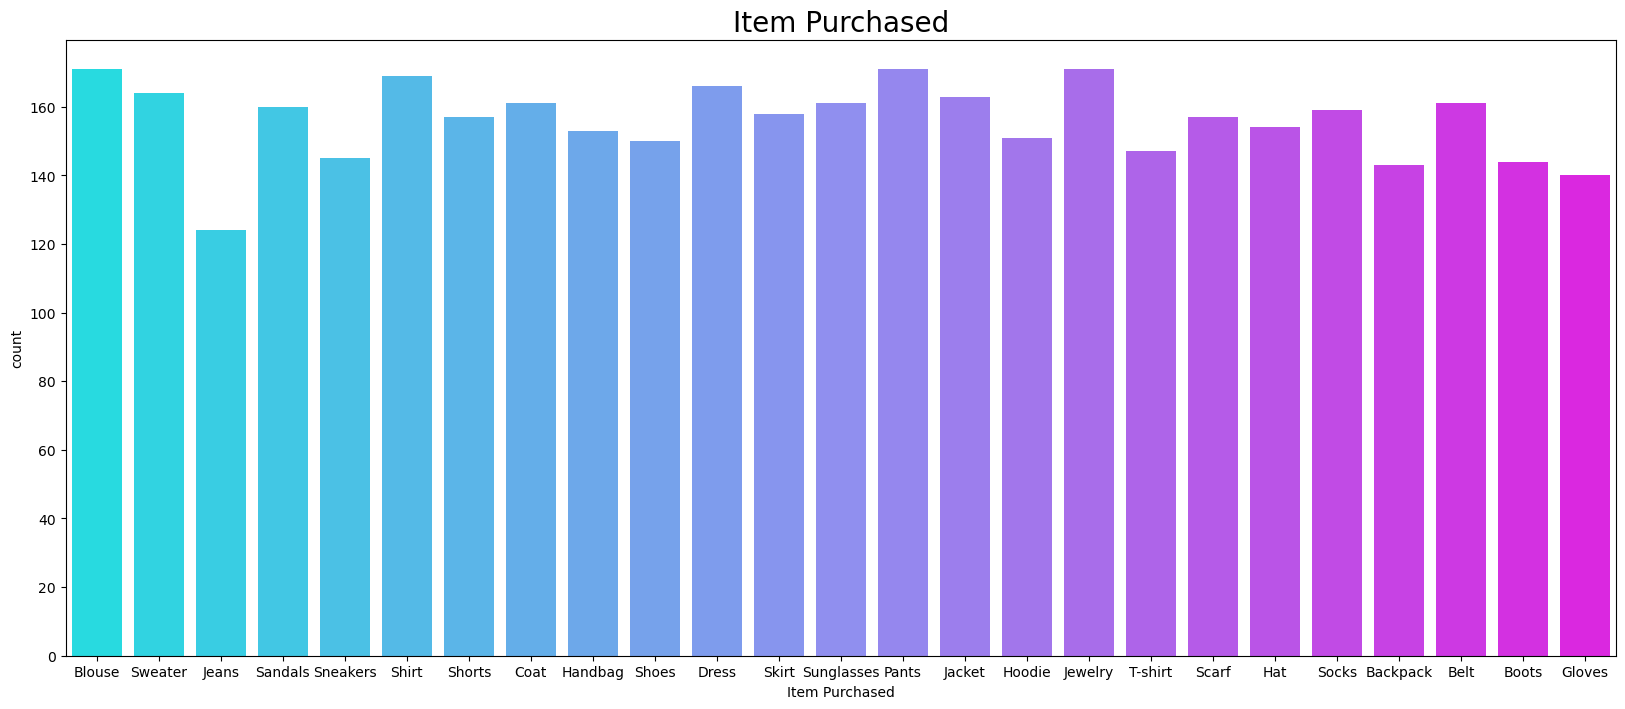

In [16]:
plt.subplots(figsize=(20,8), dpi=100)
sns.countplot(data= data, x='Item Purchased',palette='cool')
plt.title("Item Purchased",fontsize=20)
plt.show()

The most sold Item are Blouse, Jewelry and Pants.

In [17]:
Count_Of_Category = data['Category'].value_counts()
Count_Of_Category

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

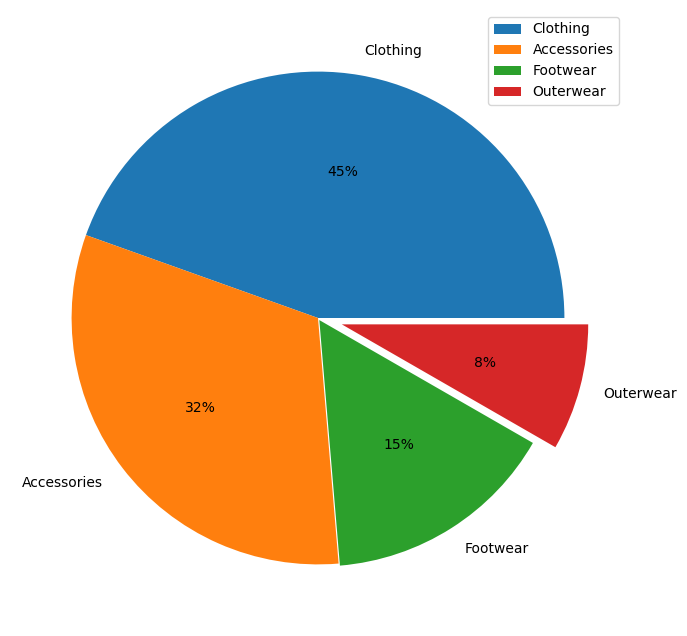

In [18]:
plt.figure(figsize=(8,8))
plt.pie(Count_Of_Category,labels=Count_Of_Category.index,autopct='%0.0f%%',explode=(0,0,0.01,0.1))
plt.legend(Count_Of_Category.index,loc =1)
plt.show()

Most types of Category of the item purchased are Clothing and Accessories.

In [19]:
data['Location'].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

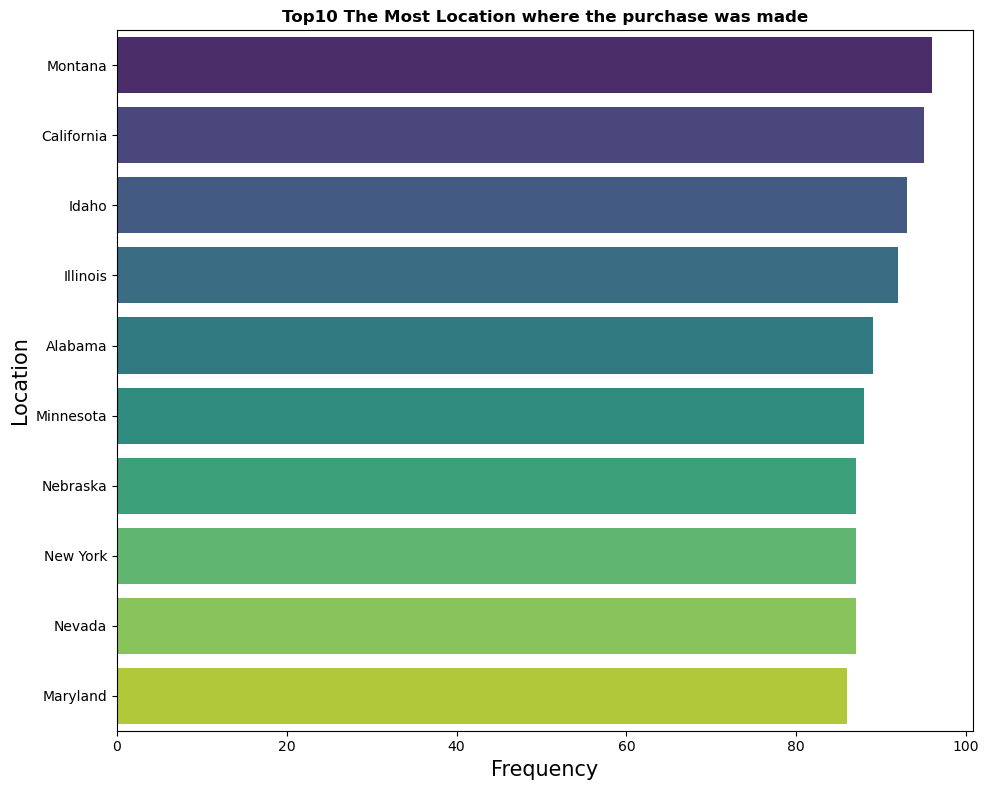

In [20]:
top_10_Location = data.Location.value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_Location, y=top_10_Location.index,palette='viridis',linewidth = 4)
plt.title('Top10 The Most Location where the purchase was made',loc='center',fontweight='bold',fontsize=12)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Location',fontsize=15)
plt.tight_layout()
plt.show()

Top three selling cities is Montana,California and Idaho 

In [21]:
size_count = data['Size'].value_counts()
size_count

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

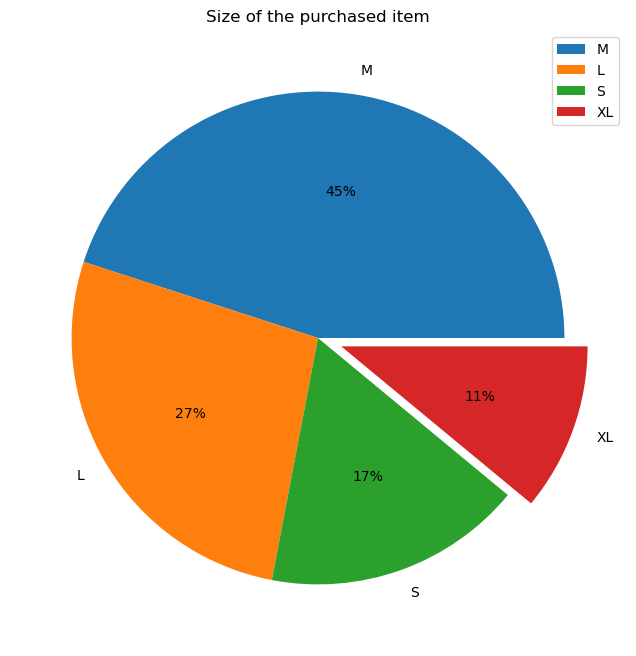

In [22]:
plt.figure(figsize=(8,8))
plt.pie(size_count,labels=['M','L','S','XL'],autopct='%0.0f%%',explode=(0,0,0,0.1))
plt.legend( ['M','L','S','XL'],loc =1)
plt.title('Size of the purchased item')
plt.show()

The best-selling size is medium, followed by large

In [47]:
data['Color'].value_counts().head(50)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

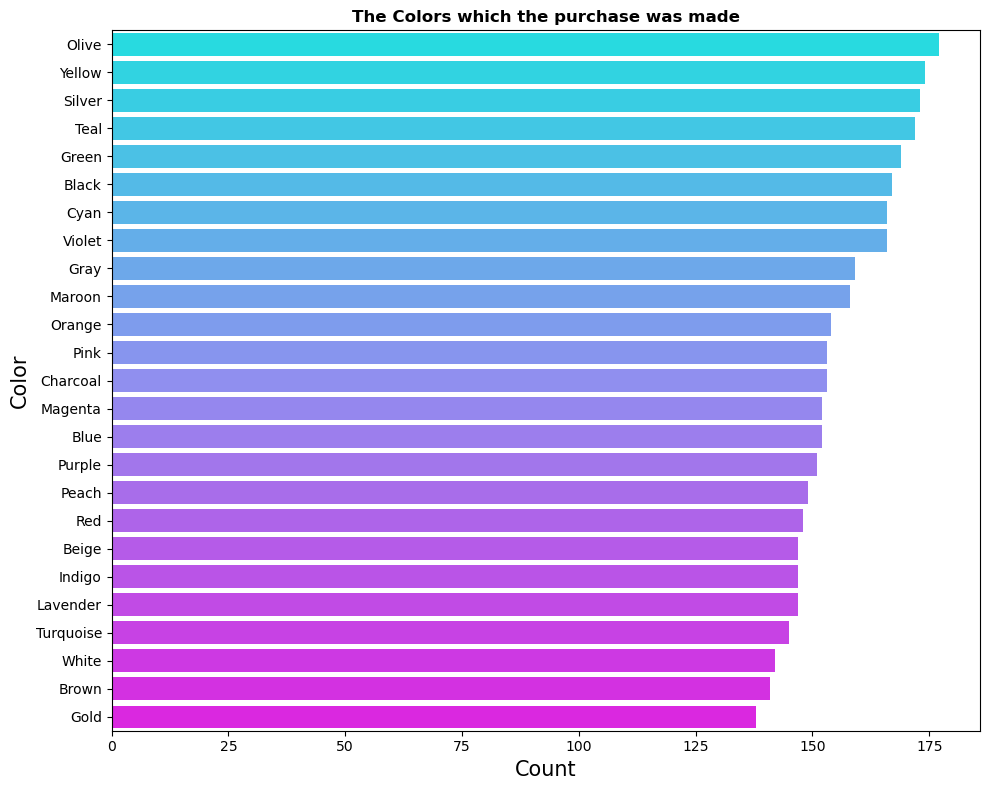

In [24]:
Color = data['Color'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=Color, y=Color.index,palette='cool',linewidth = 4)
plt.title('The Colors which the purchase was made',loc='center',fontweight='bold',fontsize=12)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Color',fontsize=15)
plt.tight_layout()
plt.show()

the then best_selling colors is olive ,yellow and selver

In [25]:
season = data['Season'].value_counts()
season

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [26]:
data['Review Rating'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

Maximum Review Rating: 5.0__
Minimum Review Rating: 2.5

<Axes: xlabel='Gender', ylabel='Review Rating'>

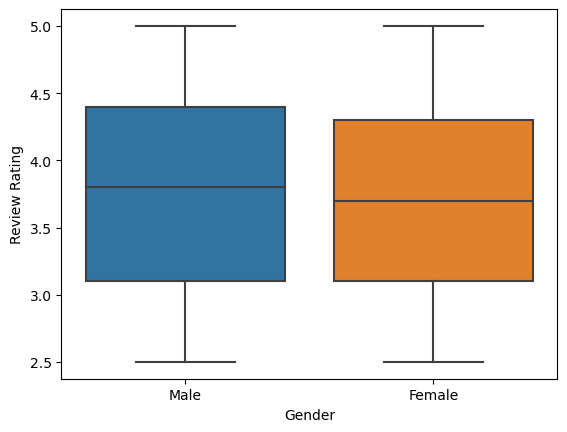

In [27]:
X=data.groupby('Gender')['Review Rating'].value_counts()
sns.boxplot(x='Gender',y='Review Rating',data=data )

Customers who have a subscription are much lower than those who do not subscribe

In [28]:
Shipping_Type = data['Shipping Type'].value_counts()
Shipping_Type

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

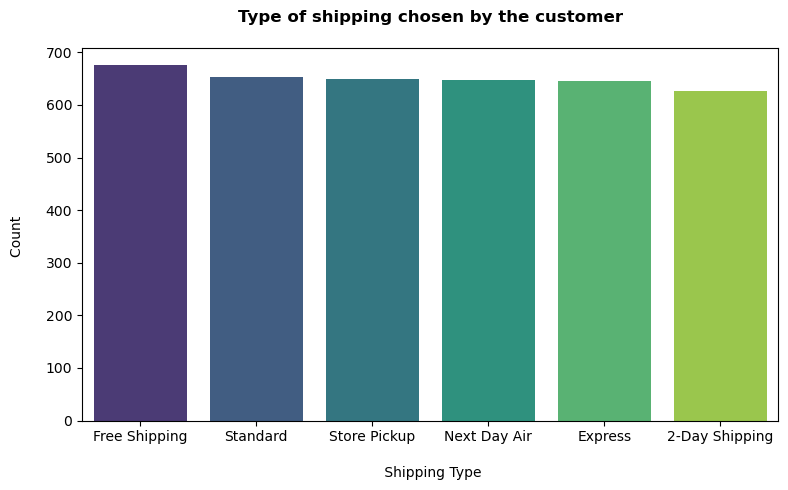

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x=Shipping_Type.index,y=Shipping_Type, palette='viridis',linewidth = 5)
plt.title('Type of shipping chosen by the customer\n',loc='center',fontweight='bold',fontsize=12)
plt.xlabel('\n Shipping Type',fontsize=10)
plt.ylabel('Count \n',fontsize=10)
plt.tight_layout()
plt.show()

In [30]:
Discount_Applied =data['Discount Applied'].value_counts()
print(Discount_Applied)

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64


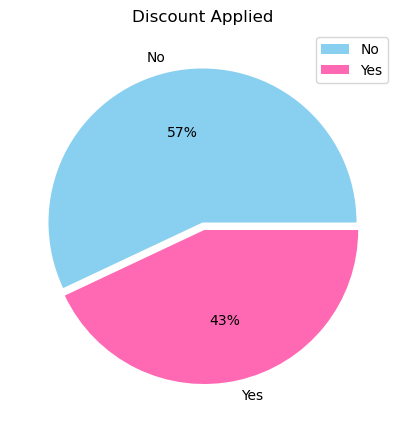

In [31]:
plt.figure(figsize=(5,5))
plt.pie(Discount_Applied,labels=['No','Yes'],colors=["#89CFF0", "#FF69B4"],autopct='%0.0f%%',explode=(0,0.05))
plt.legend( ['No','Yes'],loc =1)
plt.title('Discount Applied')
plt.show()

The percentage of people who received the discount is close to the percentage of people who did not receive a discount

In [32]:
Payment_Method = data['Payment Method'].value_counts()
Payment_Method

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

Most Common Payment Method: PayPal

In [33]:
pd.crosstab(data['Gender'], data['Category'], values=data['Age'],aggfunc=np.average)

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,44.283163,43.620504,44.482412,44.128713
Male,44.196934,43.859441,44.422500,44.394619


In [34]:
data.groupby('Gender')['Purchase Amount (USD)'].sum()

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

The total purchase amount for each gender

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

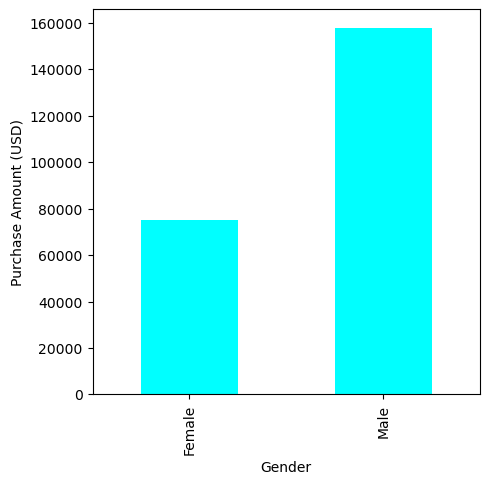

In [35]:
data.groupby('Gender')['Purchase Amount (USD)'].sum().plot(kind='bar',
figsize=(5,5),colormap='cool',ylabel='Purchase Amount (USD)')

The number of items purchased from each category

In [36]:
data.groupby(['Gender','Category'])['Purchase Amount (USD)'].sum()

Gender  Category   
Female  Accessories    23819
        Clothing       33636
        Footwear       11835
        Outerwear       5901
Male    Accessories    50381
        Clothing       70628
        Footwear       24258
        Outerwear      12623
Name: Purchase Amount (USD), dtype: int64

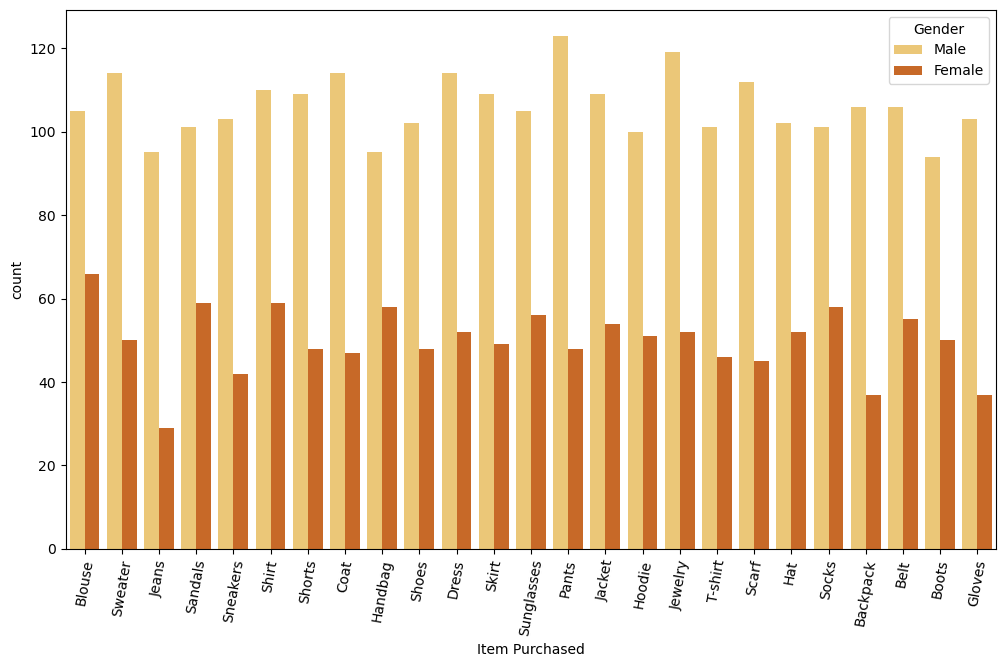

In [37]:
plt.figure(figsize=(12,7))
sns.countplot(x='Item Purchased',data=data,hue='Gender',palette='YlOrBr',saturation=.75, width=.8)
plt.xticks(rotation=80)
plt.show()

<Axes: xlabel='Gender,Category', ylabel='Purchase Amount (USD)'>

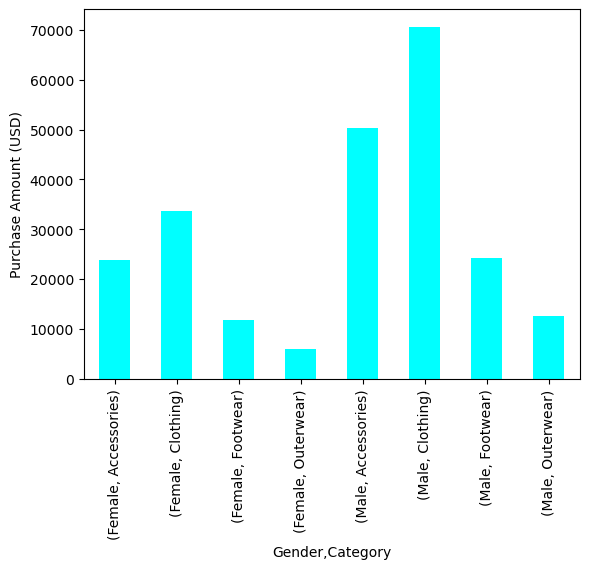

In [38]:
data.groupby(['Gender','Category'])['Purchase Amount (USD)'].sum().plot(kind='bar',colormap='cool',ylabel='Purchase Amount (USD)')

To Know the total purchase amount for Items Purchased from each category

In [39]:
pd.crosstab(data['Season'],data['Category'])

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,324,427,136,88
Spring,301,454,163,81
Summer,312,408,160,75
Winter,303,448,140,80


<Axes: xlabel='Season', ylabel='Count'>

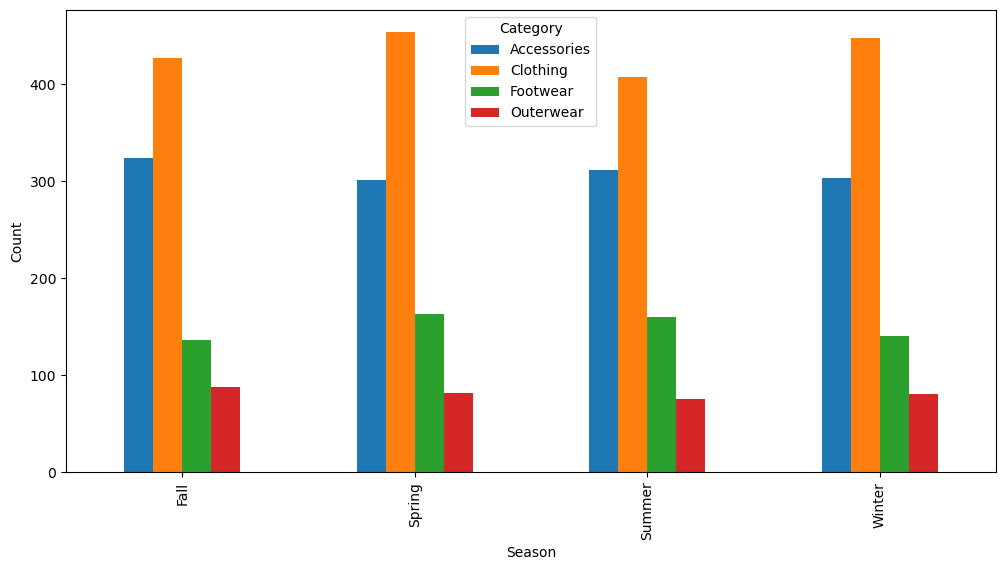

In [40]:
pd.crosstab(data['Season'],data['Category']).plot(kind='bar',figsize=(12,6),ylabel='Count')

To know the number of Item Purchased in each season

In [41]:
data[data['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()

Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64

In [42]:
pd.crosstab(data['Season'],data['Item Purchased']).T


Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,34,39,45,25
Belt,41,41,39,40
Blouse,42,46,43,40
Boots,35,40,38,31
Coat,34,46,42,39
Dress,36,43,47,40
Gloves,37,42,29,32
Handbag,48,36,35,34
Hat,50,27,37,40


<Axes: xlabel='Item Purchased', ylabel='Count'>

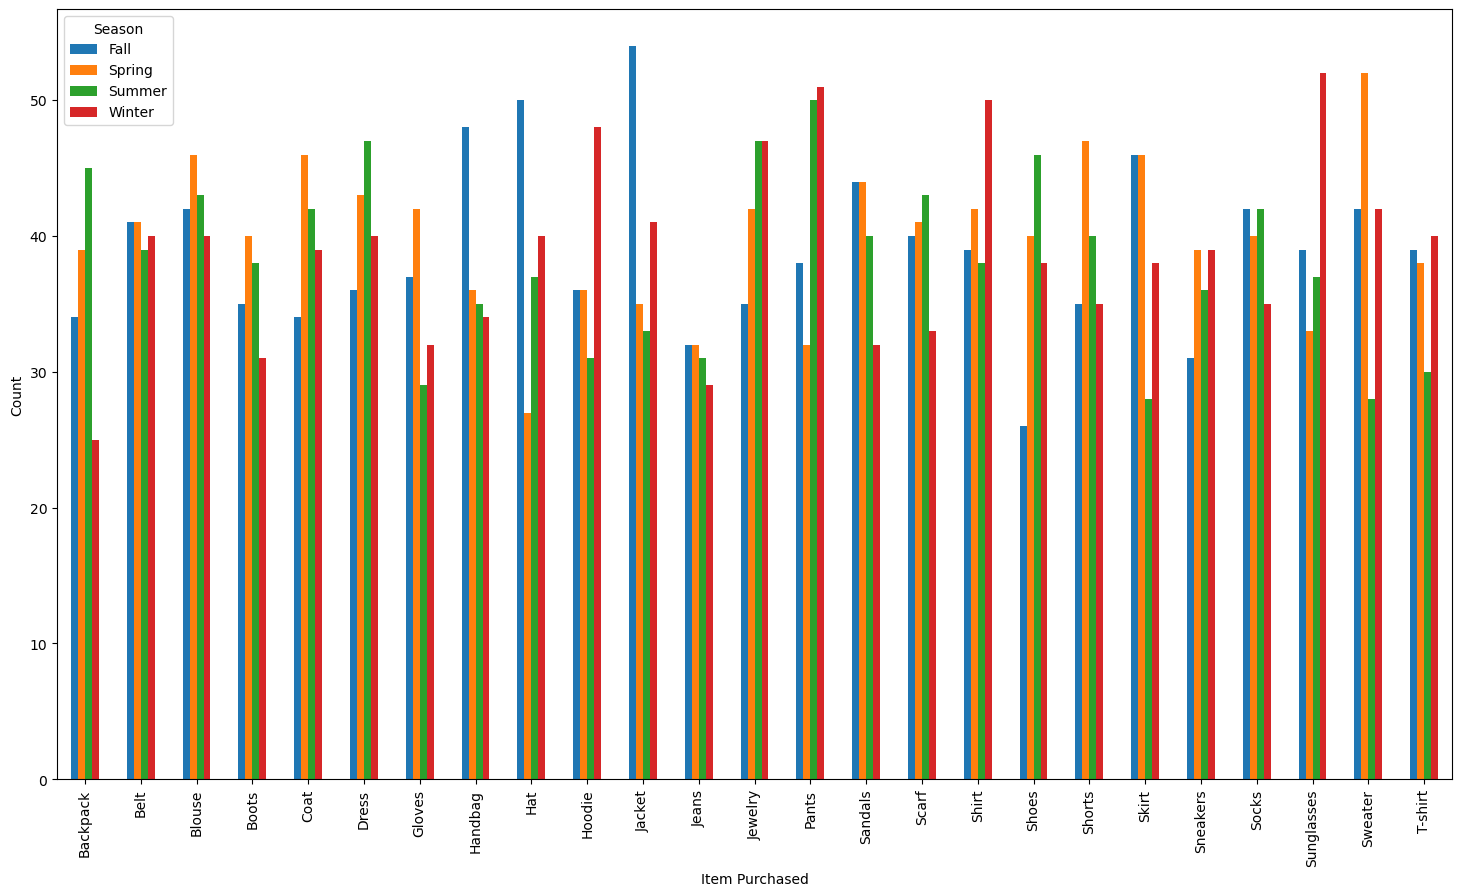

In [43]:
pd.crosstab(data['Item Purchased'],data['Season']).plot(kind='bar',figsize=(18,10),ylabel='Count')

To know the Total Purchase Amount for categories that are purchased in each season


In [44]:
pd.crosstab(data['Season'],data['Category'],values=data['Purchase Amount (USD)'],aggfunc=np.sum)

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,19874,26220,8665,5259
Spring,17007,27692,9555,4425
Summer,19028,23078,9393,4278
Winter,18291,27274,8480,4562


<Axes: xlabel='Season', ylabel='Purchase Amount (USD)'>

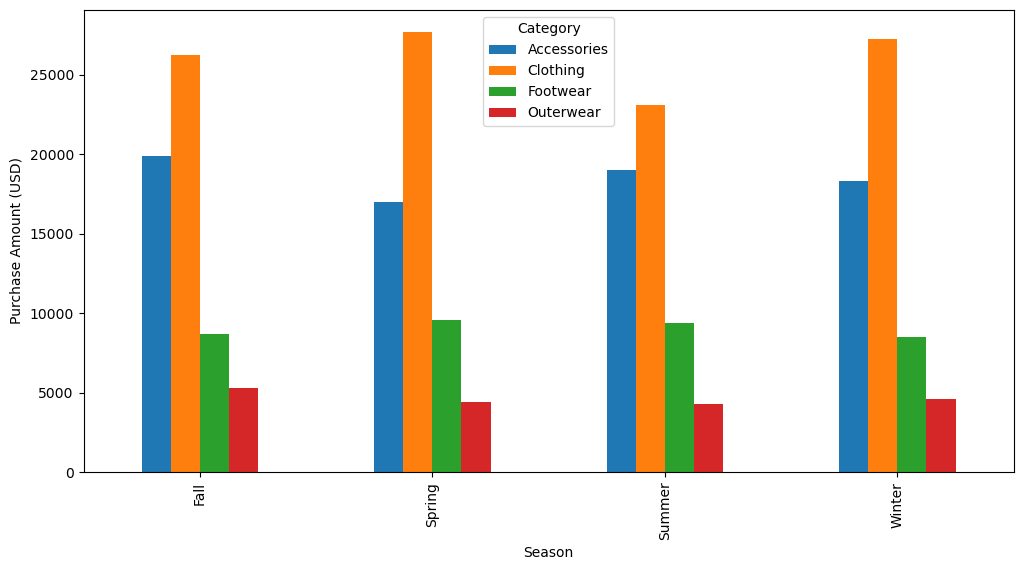

In [45]:
pd.crosstab(data['Season'],data['Category'],values=data['Purchase Amount (USD)'],aggfunc=np.sum).plot(kind='bar',figsize=(12,6),ylabel='Purchase Amount (USD)')

~summaries && conclusions about the data.

~We notice that the number of male customers is much greater than the number of female customers(more than double the number).

~The most sold Item are Blouse, Jewelry and Pants.

~Most types of Category of the item purchased are Clothing and Accessories.

~Most types of Category of the item purchased are Clothing and Accessories.

~Median Purchase Amount (USD):60.0

~Top three selling cities is Montana,California and Idaho 

~The best-selling size is medium, followed by large

~the then best_selling colors is olive ,yellow and selver

~Customers who have a subscription are much lower than those who do not 

~Most Common Payment Method: PayPalsubscribe